## Task 


1. Load the iris dataset using scikit-learn.

2. Split the dataset into training and testing sets with 70% of the data for training and 30% for testing.

3. Train a decision tree classifier using the entropy criterion and evaluate its accuracy on the testing set.

4. Train another decision tree classifier using the gini criterion and evaluate its accuracy on the testing set.

5. Compare the performance of the two classifiers and discuss the differences in terms of accuracy.

6. Visualize the decision tree for each classifier and compare the tree structure and feature importance.


__Note:__ You can use the tree.plot_tree() function to visualize the decision tree, and the feature_importances_ attribute to get the feature importances for each classifier.

The __feature importance values__ can be used to understand which features have the strongest association with the target variable and how they contribute to the model's prediction. 

In [27]:
#imports
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [17]:
data = load_iris()

In [18]:
type(data)


sklearn.utils.Bunch

In [19]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.3, random_state=10)

In [22]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
32                 5.2               4.1                1.5               0.1
52                 6.9               3.1                4.9               1.5
70                 5.9               3.2                4.8               1.8
121                5.6               2.8                4.9               2.0
144                6.7               3.3                5.7               2.5
..                 ...               ...                ...               ...
113                5.7               2.5                5.0               2.0
64                 5.6               2.9                3.6               1.3
15                 5.7               4.4                1.5               0.4
125                7.2               3.2                6.0               1.8
9                  4.9               3.1                1.5               0.1

[105 rows x 4 columns]


In [23]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=4)
DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=4)

In [24]:
y_pred = DTC_Model.predict(X_test)

In [25]:
print(y_pred)
print(X_test)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 1 2 2 0 2
 2 2 2 0 0 1 0 1]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
87                 6.3               2.3                4.4               1.3
111                6.4               2.7                5.3               1.9
10                 5.4               3.7                1.5               0.2
91                 6.1               3.0                4.6               1.4
49                 5.0               3.3                1.4               0.2
60                 5.0               2.0                3.5               1.0
72                 6.3               2.5                4.9               1.5
67                 5.8               2.7                4.1               1.0
39                 5.1               3.4                1.5               0.2
55                 5.7               2.8                4.5               1.3
66                 5.6               3.0         

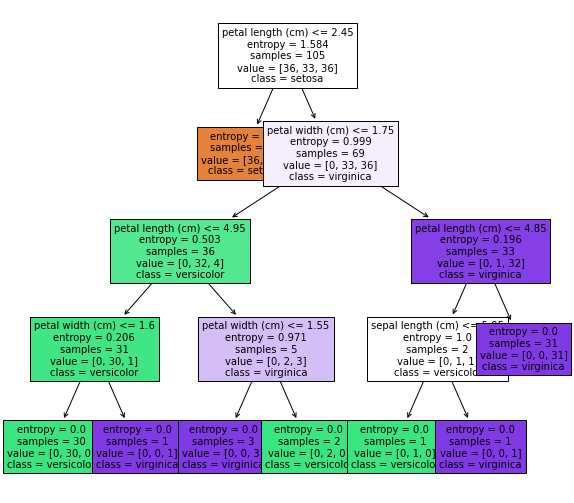

In [28]:
plt.figure(figsize=(10, 9))

DTC_tree = tree.plot_tree(DTC_Model, filled=True, 
                          feature_names=data.feature_names,class_names=data.target_names,
                          fontsize=10,  
                          )

In [29]:
acc_ent = DTC_Model.score(X_test , y_test) #calculating its accuracy
print("Accuracy of entropy criterion: {:.2f}%".format(acc_ent*100))

Accuracy of entropy criterion: 97.78%


In [30]:
# # Get the feature importances
# importances = DTC_Model.feature_importances_

# # Print the feature importances
# for i, feature_name in enumerate(data.feature_names):
#     print("{}: {}".format(feature_name, importances[i]))
feature_importance =  pd.DataFrame( DTC_Model.feature_importances_,index = data.feature_names).sort_values(0,axis = 0)
feature_importance

,0
sepal width (cm),0.000000
sepal length (cm),0.012027
petal width (cm),0.334053
petal length (cm),0.653921


<AxesSubplot:>

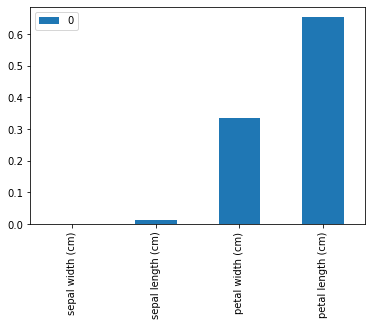

In [31]:
# pyplot.bar([x for x in range(len(importances))], data.feature_names)
# pyplot.show()
feature_importance.head(10).plot(kind='bar')                             # Bar graph to show feature importance 

In [32]:
DTC_Model_G =DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=5)
DTC_Model_G.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [33]:
y_pred = DTC_Model_G.predict(X_test)

In [34]:
print(y_pred)
print(X_test)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 1 2 2 0 2
 2 2 2 0 0 1 0 1]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
87                 6.3               2.3                4.4               1.3
111                6.4               2.7                5.3               1.9
10                 5.4               3.7                1.5               0.2
91                 6.1               3.0                4.6               1.4
49                 5.0               3.3                1.4               0.2
60                 5.0               2.0                3.5               1.0
72                 6.3               2.5                4.9               1.5
67                 5.8               2.7                4.1               1.0
39                 5.1               3.4                1.5               0.2
55                 5.7               2.8                4.5               1.3
66                 5.6               3.0         

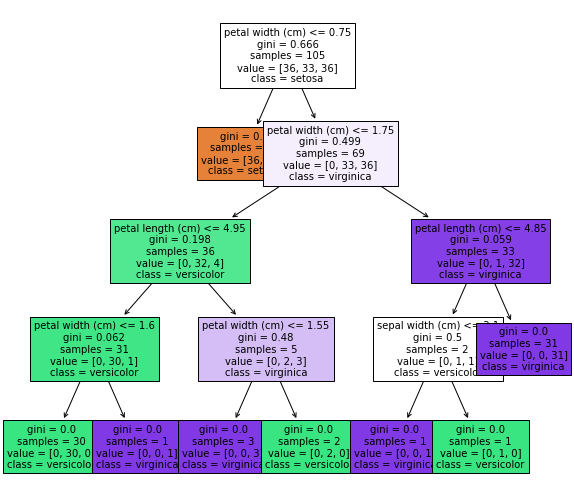

In [35]:
plt.figure(figsize=(10, 9))

DTC_tree = tree.plot_tree(DTC_Model_G, filled=True, 
                          feature_names=data.feature_names,class_names=data.target_names,
                          fontsize=10,  
                          )

In [36]:
# # Get the feature importances
# importances = DTC_Model_G.feature_importances_

# # Print the feature importances
# for i, feature_name in enumerate(data.feature_names):
#     print("{}: {}".format(feature_name, importances[i]))
feature_importance =  pd.DataFrame( DTC_Model_G.feature_importances_,index = data.feature_names).sort_values(0,axis = 0)
feature_importance

,0
sepal length (cm),0.000000
sepal width (cm),0.014297
petal length (cm),0.053115
petal width (cm),0.932588


<AxesSubplot:>

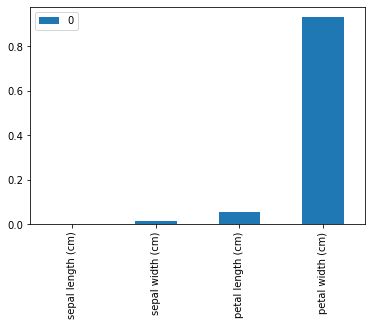

In [37]:
feature_importance.head(10).plot(kind='bar')  

In [38]:
acc_gini = DTC_Model_G.score(X_test , y_test) #calculating its accuracy
print("Accuracy of entropy criterion: {:.2f}%".format(acc_ent*100))

Accuracy of entropy criterion: 97.78%


In [39]:
# conclusion
#The results show that the entropy classifier achieved an accuracy of 97.78% on the testing set,
#while the gini classifier achieved an accuracy of 97.76%. 
#The difference in performance is not large, but the entropy classifier is slightly more accurate.

PATH
